In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import hockey.hockey_env as h_env

from rl_hockey.sac import SAC
from rl_hockey.common import utils

In [2]:
env = h_env.HockeyEnv(mode=h_env.Mode.NORMAL)

o_space = env.observation_space
ac_space = env.action_space

In [3]:
agent = SAC(o_space.shape[0], action_dim=ac_space.shape[0] // 2, noise='pink', max_episode_steps=250)
# agent.load("../../../results/hyperparameter_runs/2026-01-17_20-35-18/models/run_lr1e03_bs256_h128_128_128_4c1f51eb_20260117_203518_vec16.pt")
# agent.load("../../../results/sac_runs/2026-01-26_21-27-01/models/SAC_run_lr1e03_bs256_h128_128_128_4c1f51eb_20260126_212701_vec24_ep010000.pt")
agent.load("../../../results/sac_runs/2026-02-24_03-50-23-best/models/SAC_run_lr1e03_bs256_h128_128_128_4c1f51eb_20260224_035023_ep200000.pt")

In [4]:
opponent = h_env.BasicOpponent(weak=False)

In [5]:
N = 100
win_count = 0
total_reward = 0

steps_per_ep = []
episodes = []

r_closeness = []
r_touch = []
r_direction = []

In [6]:
for i in tqdm(range(N)):
    state, _ = env.reset()

    episode = []
    for t in range(250):
        env.render(mode="human")

        done = False
        action1 = agent.act(state.astype(np.float32), deterministic=True)
        action2 = opponent.act(env.obs_agent_two())

        (next_state, reward, done, trunc, info)  = env.step(np.hstack([action1, action2]))
        episode.append((state, next_state, reward, action1, action2))

        r_closeness.append(info['reward_closeness_to_puck'])
        r_touch.append(info['reward_touch_puck'])
        r_direction.append(info['reward_puck_direction'])

        state = next_state

        total_reward += reward

        if done or trunc:
            steps_per_ep.append(t + 1)
            break
    
    if info['winner'] == 1:
        win_count += 1
        episodes.append(episode)

print(f"Average Reward over {N} episodes: {total_reward / N}")
print(f"Win Rate over {N} episodes: {win_count / N}")

print(f"Average closeness reward: {np.mean(r_closeness)}")
print(f"Average touch reward: {np.mean(r_touch)}")
print(f"Average direction reward: {np.mean(r_direction)}")

plt.hist(steps_per_ep, bins=20)
plt.title("Steps per Episode")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\Jannik\anaconda3\envs\rl-hockey\lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists
 65%|██████▌   | 65/100 [01:08<00:36,  1.05s/it]


KeyboardInterrupt: 

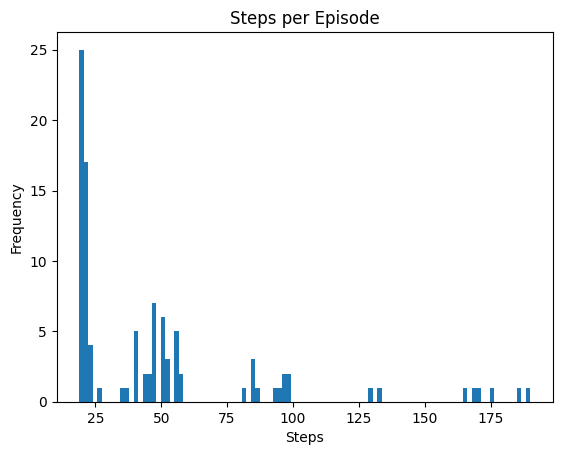

In [7]:
plt.hist(steps_per_ep, bins=100)
plt.title("Steps per Episode")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

In [7]:
env.close()